--> Handling the class imbalance using SMOTE

-->Modelling classifiers and evaluating them using metrics - Recall, Precision, Accuracy, F1 score & AUC-ROC


**IMPORTS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score,auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv',index_col = 0)

In [4]:
data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016,1,1,1,2016-01-01,14747,SEA,14771,SFO,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016,1,1,1,2016-01-01,14747,SEA,12892,LAX,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016,1,1,1,2016-01-01,14747,SEA,12266,IAH,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016,1,1,1,2016-01-01,14747,SEA,10397,ATL,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840272,2017,4,12,17,2017-12-17,11618,EWR,13303,MIA,2100,...,1024,100,28,16,32,29,88,2017-12-17,2100,EWR
1840273,2017,4,12,17,2017-12-17,13930,ORD,14771,SFO,2322,...,1016,100,34,12,37,34,90,2017-12-17,2300,ORD
1840274,2017,4,12,17,2017-12-17,12266,IAH,12892,LAX,2159,...,1020,97,55,7,57,57,92,2017-12-17,2200,IAH
1840275,2017,4,12,17,2017-12-17,12266,IAH,11292,DEN,2151,...,1020,97,55,7,57,57,92,2017-12-17,2200,IAH


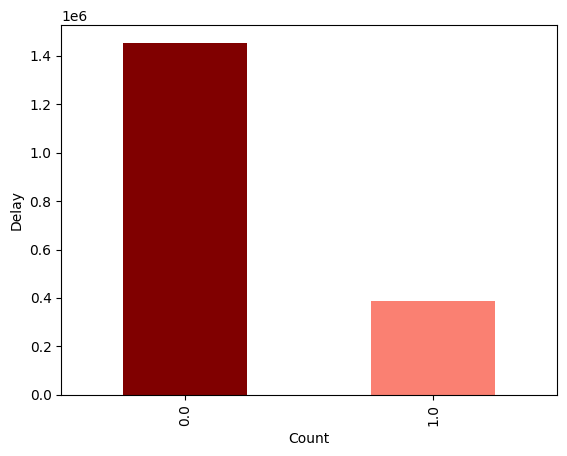

In [12]:
data['ArrDel15'].value_counts().plot(kind = 'bar', color = ['maroon', 'salmon'])
plt.xlabel("Count")
plt.ylabel("Delay")
plt.show()

In [5]:
data.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "New_time",
                 "date",
                 "airport_code"
                 ],
        inplace=True)

In [6]:
labelEncoder = LabelEncoder()
data["Origin"] = labelEncoder.fit_transform(data["Origin"])
data["Dest"] = labelEncoder.fit_transform(data["Dest"])

In [7]:
X = data.drop('ArrDel15', axis = 1)
y = data['ArrDel15']

**RESAMPLING USING SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Flight_delay_prediction/smoted_data.pkl', 'wb') as file:
    pickle.dump((X_resampled, y_resampled), file)

In [8]:
import pickle
with open('/content/drive/MyDrive/Flight_delay_prediction/smoted_data.pkl', 'rb') as file:
    X_resampled, y_resampled = pickle.load(file)

In [9]:
X_resampled = X_resampled.drop(columns = ['ArrDelayMinutes'])

In [10]:
y_resampled

0          0.0
1          1.0
2          0.0
3          0.0
4          0.0
          ... 
2909111    1.0
2909112    1.0
2909113    1.0
2909114    1.0
2909115    1.0
Name: ArrDel15, Length: 2909116, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [12]:
X_test

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
1072616,2017,1,3,18,3,12,2030,2039.000000,9.000000,0.0,...,0.000000,10,1022,9,65,14,83,82,56,2000
2807699,2016,1,4,11,3,3,1844,1946.126002,61.256526,1.0,...,4.919979,6,1015,99,63,17,67,66,90,1800
1092750,2017,1,3,14,8,7,1555,1629.000000,34.000000,1.0,...,0.000000,10,1017,78,61,13,70,68,80,1600
1993844,2016,3,7,30,3,9,1509,1614.826830,65.115447,1.0,...,0.796259,9,1013,98,75,40,82,81,81,1500
1681494,2017,4,10,13,2,0,1100,1057.000000,0.000000,0.0,...,0.000000,10,1017,0,35,15,52,52,53,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519725,2016,3,8,15,3,10,2222,2249.363907,27.313878,1.0,...,0.100000,10,1015,100,65,15,75,76,42,2200
698770,2016,3,8,1,3,0,1825,1826.000000,1.000000,0.0,...,0.000000,10,1014,0,60,26,101,100,26,1800
1087646,2017,1,3,31,3,9,1055,1050.000000,0.000000,0.0,...,0.000000,10,1009,100,51,20,68,69,54,1100
2007440,2016,4,11,14,7,7,700,910.986432,130.986432,1.0,...,5.698434,6,1013,100,45,33,47,40,95,700


In [13]:
X_train

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
825808,2016,4,11,30,6,14,1925,1926.000000,1.000000,0.0,...,5.700000,8,1006,100,56,33,57,54,97,1900
2377101,2016,3,11,27,8,6,2100,2237.632493,97.326237,1.0,...,0.000000,10,1019,0,58,9,71,72,63,2100
715696,2016,4,10,14,3,14,1840,1902.000000,22.000000,1.0,...,0.000000,10,1016,0,67,13,89,88,49,1800
2477917,2016,3,8,16,14,0,1044,1135.443134,50.704578,1.0,...,0.000000,10,1015,53,55,7,65,62,79,1000
1197541,2017,2,4,23,6,10,1330,1555.000000,145.000000,1.0,...,0.100000,10,1017,44,41,17,53,54,60,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,2017,4,11,22,4,9,1845,1941.000000,56.000000,1.0,...,0.000000,10,1015,6,32,31,41,33,70,1800
2356330,2016,2,4,21,13,5,1507,1533.824721,26.175279,1.0,...,0.000000,10,1011,95,45,9,70,69,39,1500
2229084,2017,1,1,4,2,11,1624,1705.527708,41.314861,1.0,...,0.168514,10,1009,92,53,12,59,57,84,1600
2768307,2016,3,7,9,8,10,700,838.348190,98.348190,1.0,...,0.000000,10,1029,10,37,15,41,36,82,700


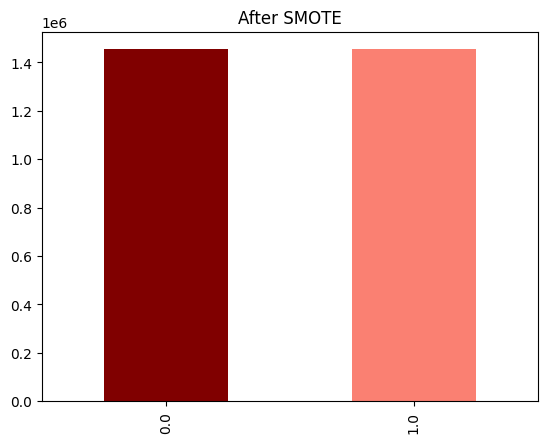

In [20]:
y_resampled.value_counts().plot(kind = 'bar', color = ['maroon', 'salmon'])
plt.title('After SMOTE')
plt.show()

**Modelling classifiers and evaluating them**


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87    290461
         1.0       0.91      0.79      0.85    291363

    accuracy                           0.86    581824
   macro avg       0.86      0.86      0.86    581824
weighted avg       0.86      0.86      0.86    581824



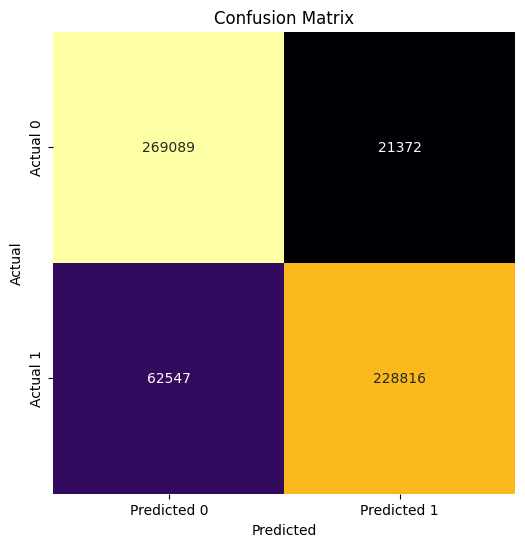


AUC-ROC: 0.9171425983536643


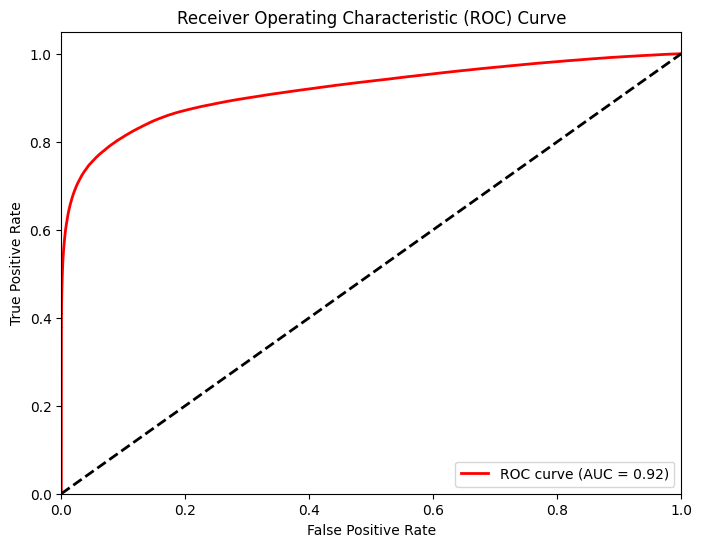

In [16]:
#logistic classifier
#logistic_model = LogisticRegression(max_iter=3000, random_state=42 )
#logistic_model.fit(X_train, y_train)
with open('/content/drive/MyDrive/Flight_delay_prediction/logistic_classifier.pkl','rb') as file:
  logistic_model = pickle.load(file)
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

classification_rep = classification_report(y_test, y_pred)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_prob)
roc_auc_lg = roc_auc_score(y_test, y_prob)

precision = classification_rep.split()[-8]
recall = classification_rep.split()[-7]
specificity = classification_rep.split()[-6]
f1_score = classification_rep.split()[-5]

print("\nClassification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
custom_cmap = plt.get_cmap('inferno')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAUC-ROC:", roc_auc_lg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lg))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90    290461
         1.0       0.90      0.91      0.90    291363

    accuracy                           0.90    581824
   macro avg       0.90      0.90      0.90    581824
weighted avg       0.90      0.90      0.90    581824



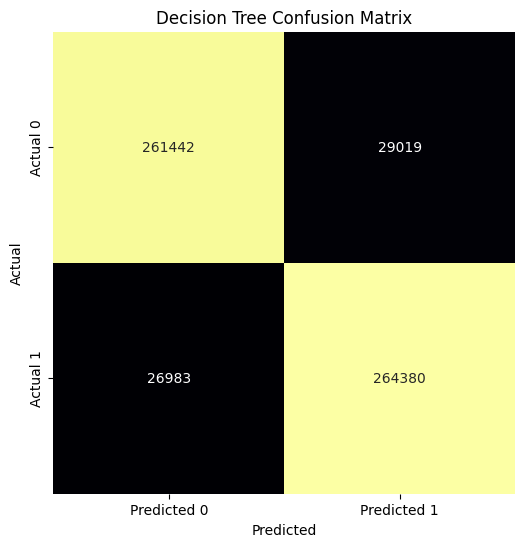


AUC-ROC: 0.9037556591438424


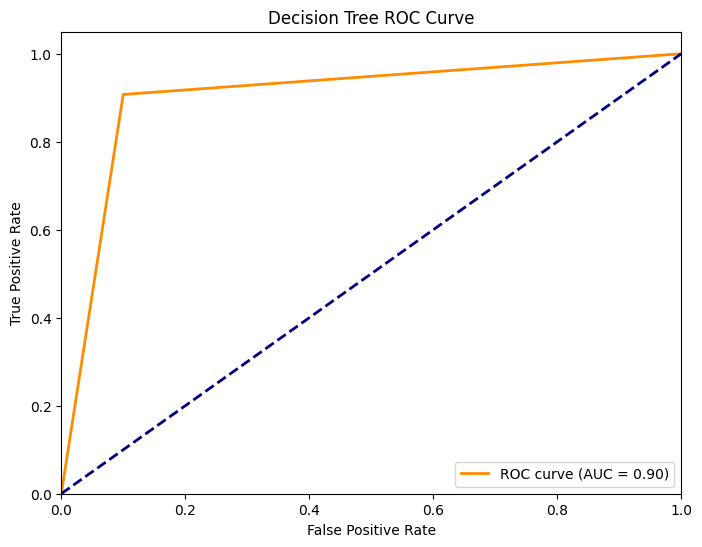

In [17]:
#Decision Tree classifier
#decision_tree = DecisionTreeClassifier(random_state=42)
#decision_tree.fit(X_train, y_train)
with open('/content/drive/MyDrive/Flight_delay_prediction/Decision_tree_classifier.pkl','rb') as file:
  decision_tree = pickle.load(file)
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1]

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

custom_cmap = plt.get_cmap('inferno')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob)
roc_auc_dt = roc_auc_score(y_test, y_prob)
print("\nAUC-ROC:", roc_auc_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()





Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93    290461
         1.0       0.97      0.89      0.93    291363

    accuracy                           0.93    581824
   macro avg       0.93      0.93      0.93    581824
weighted avg       0.93      0.93      0.93    581824



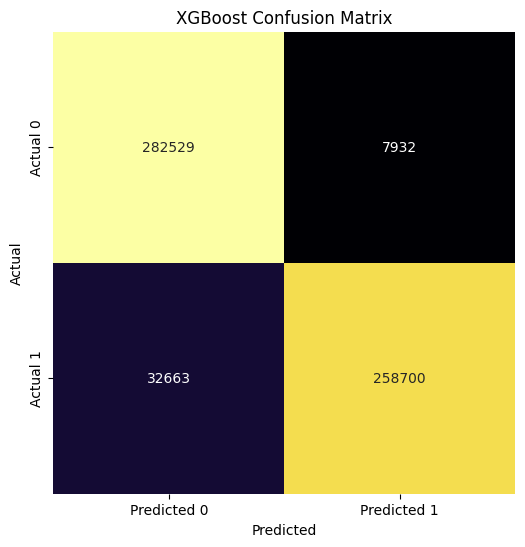


AUC-ROC: 0.9694035939474805


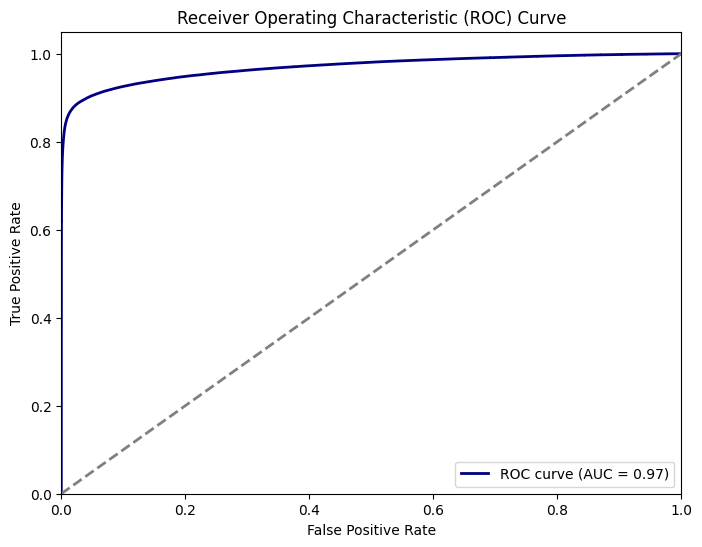

In [18]:
#xgboost
import xgboost as xgb
#xgb_classifier = xgb.XGBClassifier(random_state=42)
#xgb_classifier.fit(X_train, y_train)
with open('/content/drive/MyDrive/Flight_delay_prediction/XGB_classifier.pkl','rb') as file:
  xgb_classifier = pickle.load(file)
y_pred = xgb_classifier.predict(X_test)
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

custom_cmap = plt.get_cmap('inferno')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob)
roc_auc_xgb = roc_auc_score(y_test, y_prob)
print("\nAUC-ROC:", roc_auc_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='navy', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93    290461
         1.0       0.95      0.90      0.93    291363

    accuracy                           0.93    581824
   macro avg       0.93      0.93      0.93    581824
weighted avg       0.93      0.93      0.93    581824



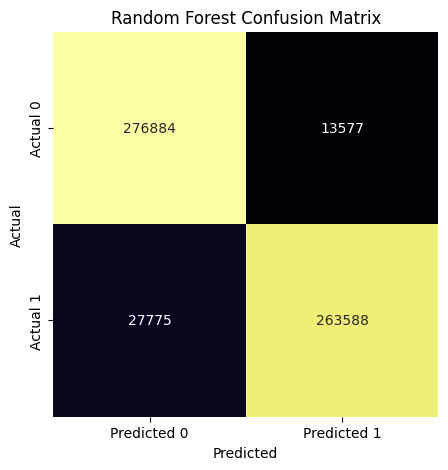


ROC AUC: 0.9756790472540418


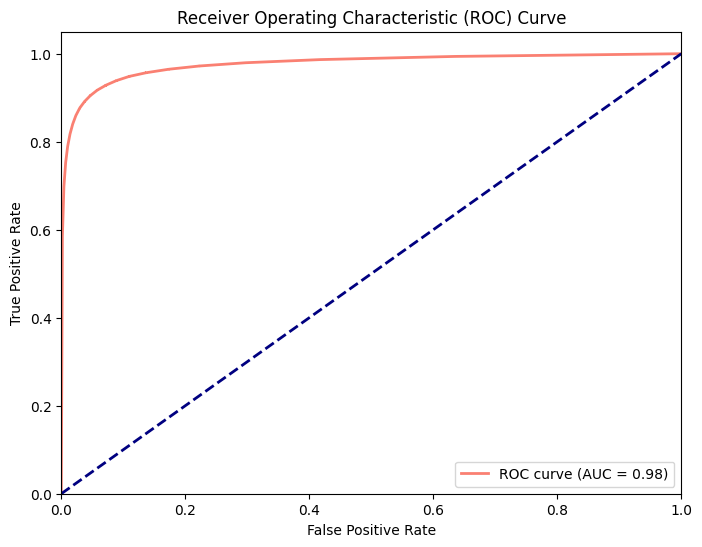

In [19]:
# Random Forest Classifier
#random_forest = RandomForestClassifier(n_estimators=20,random_state=42,n_jobs=-1)
#random_forest.fit(X_train, y_train)
with open('/content/drive/MyDrive/Flight_delay_prediction/random_forest_classifier.pkl','rb') as file:
  random_forest = pickle.load(file)
y_pred_rf = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf= roc_auc_score(y_test, y_prob_rf)

print("\nClassification Report:")
print(classification_rep_rf)

plt.figure(figsize=(12, 5))
custom_cmap = plt.get_cmap('inferno')
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

print("\nROC AUC:", roc_auc_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='salmon', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93    290461
         1.0       0.94      0.91      0.92    291363

    accuracy                           0.93    581824
   macro avg       0.93      0.93      0.93    581824
weighted avg       0.93      0.93      0.93    581824



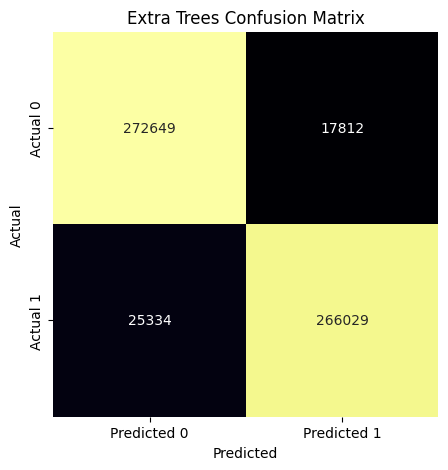


ROC AUC: 0.9741073203190023


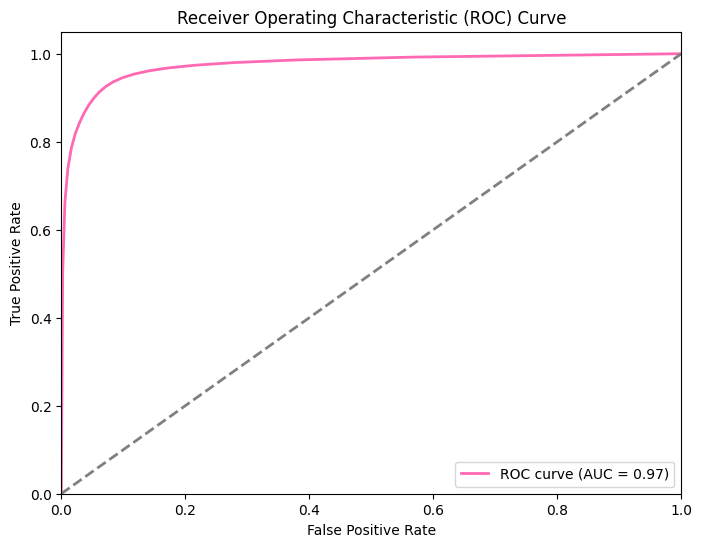

In [14]:
# Extra Trees Classifier
#extra_trees = ExtraTreesClassifier(n_estimators=20,random_state=42)
#extra_trees.fit(X_train, y_train)
with open('/content/drive/MyDrive/Flight_delay_prediction/extra_trees_classifier.pkl','rb') as file:
  extra_trees = pickle.load(file)
y_pred_et = extra_trees.predict(X_test)
y_prob_et = extra_trees.predict_proba(X_test)[:, 1]

accuracy_et = accuracy_score(y_test, y_pred_et)
classification_rep_et = classification_report(y_test, y_pred_et)
conf_matrix_et = confusion_matrix(y_test, y_pred_et)
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_prob_et)
roc_auc_et= roc_auc_score(y_test, y_prob_et)
print("\nClassification Report:")
print(classification_rep_et)

custom_cmap = plt.get_cmap('inferno')
plt.figure(figsize=(12, 5))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap=custom_cmap, cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extra Trees Confusion Matrix')
plt.show()

print("\nROC AUC:", roc_auc_et)
plt.figure(figsize=(8, 6))
plt.plot(fpr_et, tpr_et, color='hotpink', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_et))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

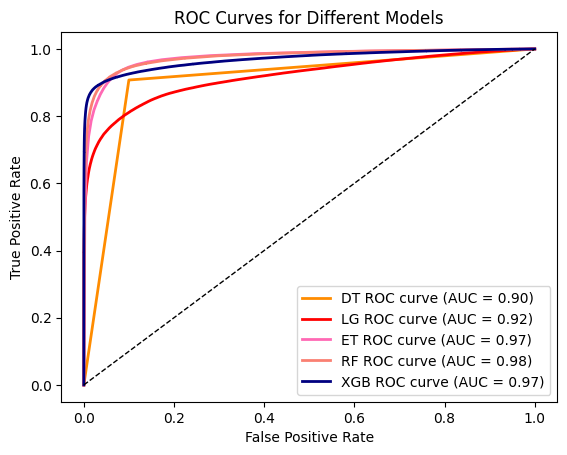

In [21]:

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'DT ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lg, tpr_lg, color='red', lw=2, label=f'LG ROC curve (AUC = {roc_auc_lg:.2f})')
plt.plot(fpr_et, tpr_et, color='hotpink', lw=2, label=f'ET ROC curve (AUC = {roc_auc_et:.2f})')
plt.plot(fpr_rf, tpr_rf, color='salmon', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='navy', lw=2, label=f'XGB ROC curve (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

plt.show()


In [ ]:
with open('/content/drive/MyDrive/Flight_delay_prediction/logistic_classifier.pkl','wb') as file:
  pickle.dump(logistic_model, file)


In [ ]:
with open('/content/drive/MyDrive/Flight_delay_prediction/Decision_tree_classifier.pkl','wb') as file:
  pickle.dump(decision_tree, file)


In [ ]:
with open('/content/drive/MyDrive/Flight_delay_prediction/XGB_classifier.pkl','wb') as file:
  pickle.dump(xgb_classifier, file)


In [ ]:
with open('/content/drive/MyDrive/Flight_delay_prediction/random_forest_classifier.pkl','wb') as file:
  pickle.dump(random_forest, file)


In [20]:
with open('/content/drive/MyDrive/Flight_delay_prediction/extra_trees_classifier.pkl','wb') as file:
  pickle.dump(extra_trees, file)
